# Test Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import mean_squared_error
    
import mydata
import performance
from performance import PerformanceMeasure, PerformanceOptimisation
from bayes import BayesianRegression

# UTKFace

In [2]:
db = "UTKFace"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_test_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_test_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_test_vgg_novel.csv", True)

In [3]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

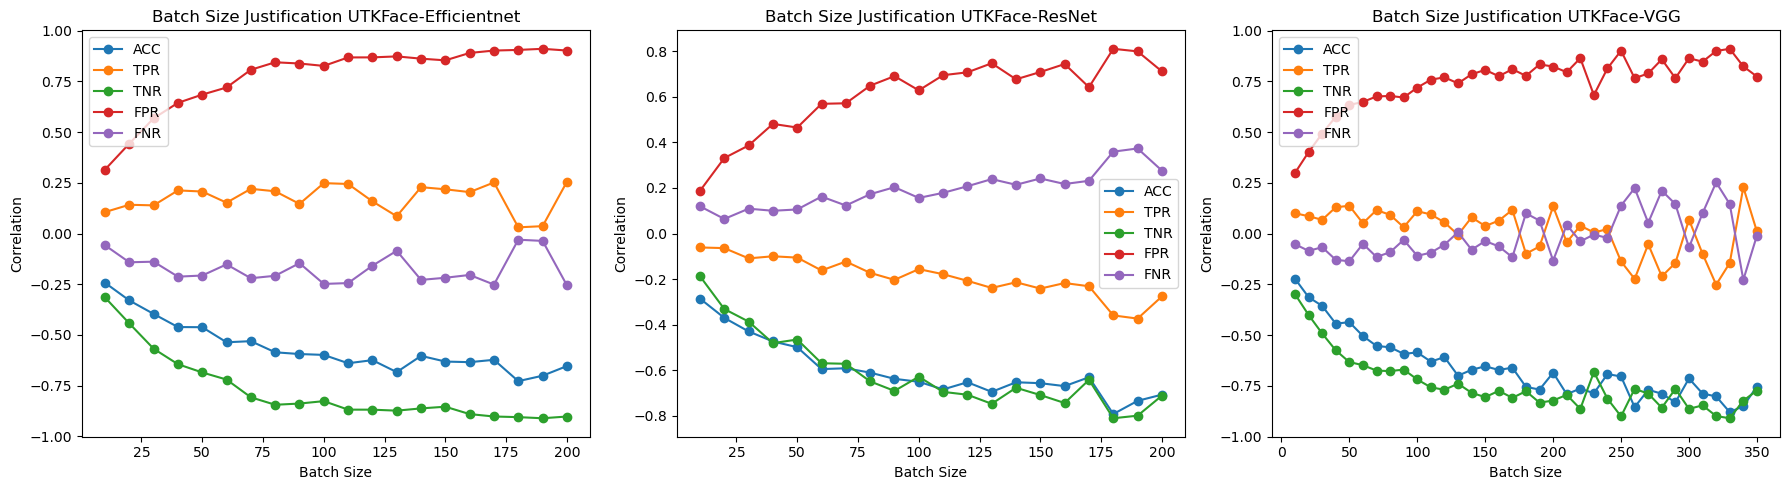

In [4]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [5]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=90)
po_resnet.check_optimal_batch_correlation(batch_size=90)
po_vgg.check_optimal_batch_correlation(batch_size=90)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.594153  0.146111 -0.838317  0.838317 -0.146111
ACC      -0.594153  1.000000  0.607267  0.790063 -0.790063 -0.607267
TPR       0.146111  0.607267  1.000000  0.047804 -0.047804 -1.000000
TNR      -0.838317  0.790063  0.047804  1.000000 -1.000000 -0.047804
FPR       0.838317 -0.790063 -0.047804 -1.000000  1.000000  0.047804
FNR      -0.146111 -0.607267 -1.000000 -0.047804  0.047804  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.637153 -0.203170 -0.690070  0.690070  0.203170
ACC      -0.637153  1.000000  0.826374  0.781242 -0.781242 -0.826374
TPR      -0.203170  0.826374  1.000000  0.377044 -0.377044 -1.000000
TNR      -0.690070  0.781242  0.377044  1.000000 -1.000000 -0.377044
FPR       0.690070 -0.781242 -0.377044 -1.000000  1.000000  0.377044
FNR       0.203170 -0.826374 -1.000000 -0.377044  0.377044  1.000000
          distance       ACC      

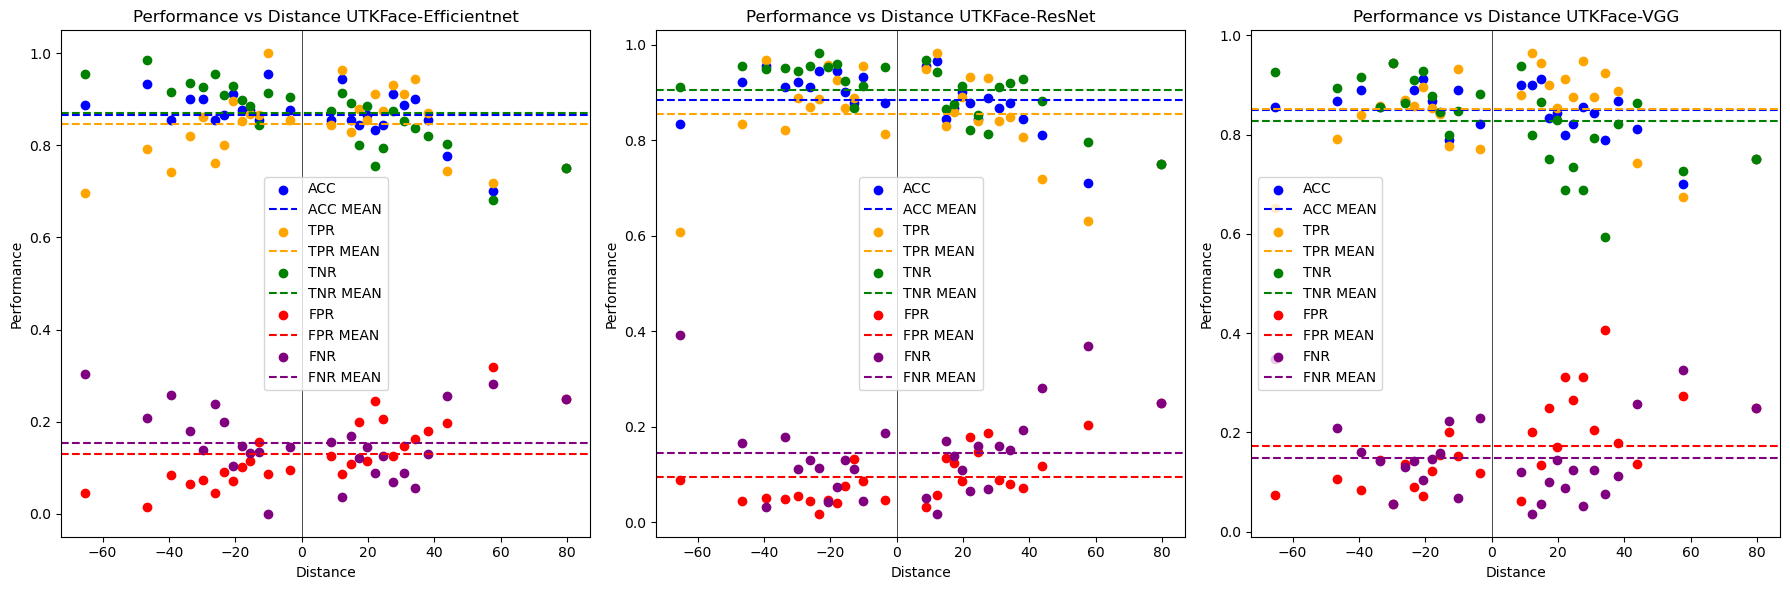

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# CelebA

In [7]:
db = "CelebA"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg_novel.csv", True)

In [8]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

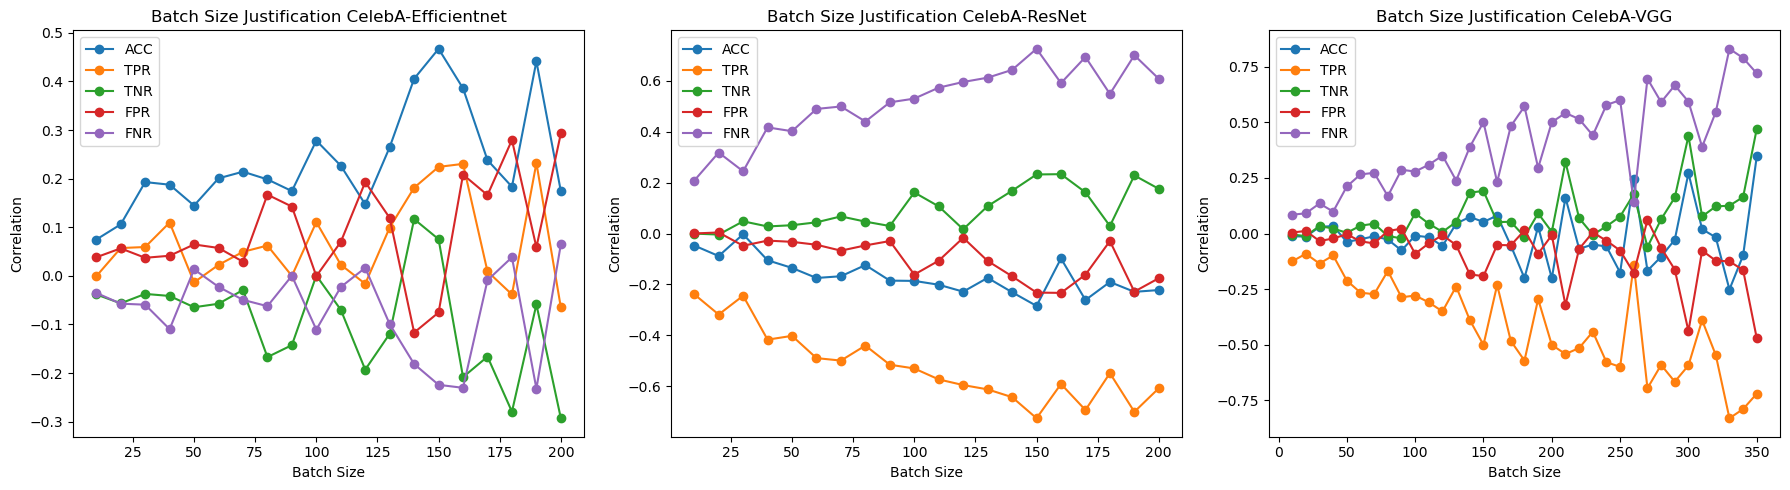

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [10]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=60)
po_resnet.check_optimal_batch_correlation(batch_size=60)
po_vgg.check_optimal_batch_correlation(batch_size=60)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000  0.200671  0.022601 -0.057441  0.057441 -0.022601
ACC       0.200671  1.000000  0.818679  0.662236 -0.662236 -0.818679
TPR       0.022601  0.818679  1.000000  0.250963 -0.250963 -1.000000
TNR      -0.057441  0.662236  0.250963  1.000000 -1.000000 -0.250963
FPR       0.057441 -0.662236 -0.250963 -1.000000  1.000000  0.250963
FNR      -0.022601 -0.818679 -1.000000 -0.250963  0.250963  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.174819 -0.489970  0.044091 -0.044091  0.489970
ACC      -0.174819  1.000000  0.811262  0.166231 -0.166231 -0.811262
TPR      -0.489970  0.811262  1.000000 -0.256808  0.256808 -1.000000
TNR       0.044091  0.166231 -0.256808  1.000000 -1.000000  0.256808
FPR      -0.044091 -0.166231  0.256808 -1.000000  1.000000 -0.256808
FNR       0.489970 -0.811262 -1.000000  0.256808 -0.256808  1.000000
          distance       ACC      

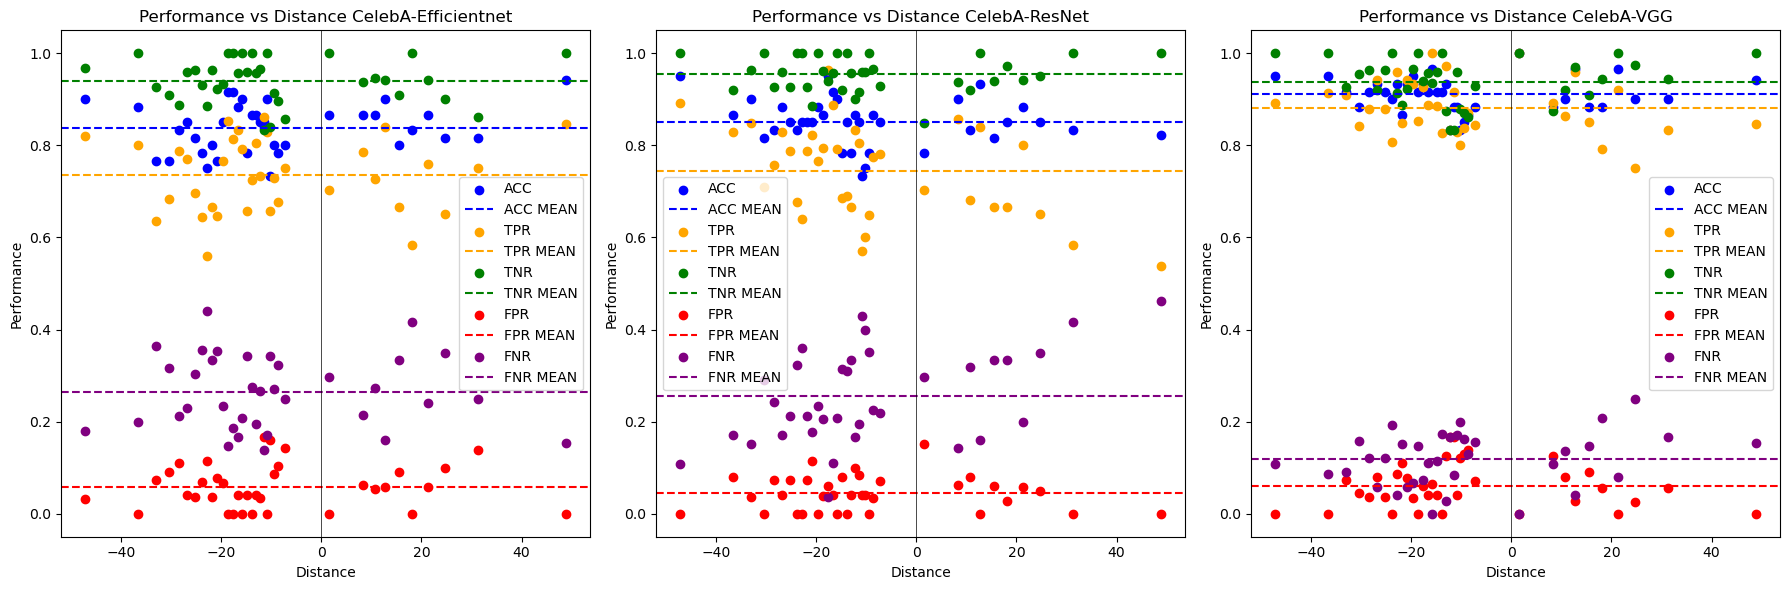

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()

# HAM10000

In [12]:
db = "HAM"
root = f"../../dataset/AAAI 2025/{db}/"
df_valid_ef3 = mydata.load_and_process_csv(f"{root}evaluation/df_valid_efficientnet_novel.csv", True)
df_valid_resnet = mydata.load_and_process_csv(f"{root}evaluation/df_valid_resnet_novel.csv", True)
df_valid_vgg = mydata.load_and_process_csv(f"{root}evaluation/df_valid_vgg_novel.csv", True)

In [13]:
po_efficientnet = PerformanceOptimisation(df_valid_ef3, db, "Efficientnet")
po_resnet = PerformanceOptimisation(df_valid_resnet, db, "ResNet")
po_vgg = PerformanceOptimisation(df_valid_vgg, db, "VGG")

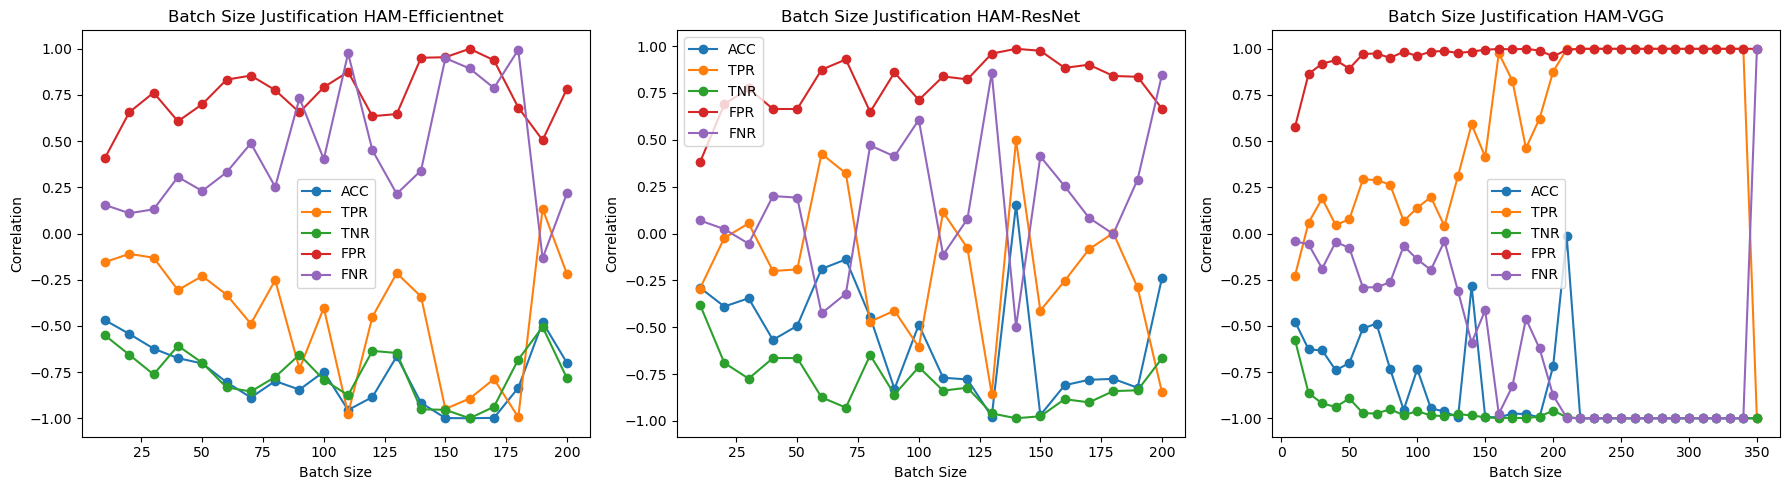

In [14]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning) # To adovid error message related one labels
    
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    po_efficientnet.check_batch_size(ax[0])
    po_resnet.check_batch_size(ax[1])
    po_vgg.check_batch_size(ax[2], b_start = 10, b_end = 360, b_step = 10)
    plt.tight_layout()
    plt.show()

In [15]:
# Correlation check
po_efficientnet.check_optimal_batch_correlation(batch_size=30)
po_resnet.check_optimal_batch_correlation(batch_size=30)
po_vgg.check_optimal_batch_correlation(batch_size=30)

          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.622975 -0.131001 -0.762673  0.762673  0.131001
ACC      -0.622975  1.000000  0.670887  0.706651 -0.706651 -0.670887
TPR      -0.131001  0.670887  1.000000  0.080704 -0.080704 -1.000000
TNR      -0.762673  0.706651  0.080704  1.000000 -1.000000 -0.080704
FPR       0.762673 -0.706651 -0.080704 -1.000000  1.000000  0.080704
FNR       0.131001 -0.670887 -1.000000 -0.080704  0.080704  1.000000
          distance       ACC       TPR       TNR       FPR       FNR
distance  1.000000 -0.345448  0.054198 -0.774117  0.774117 -0.054198
ACC      -0.345448  1.000000  0.508897  0.530173 -0.530173 -0.508897
TPR       0.054198  0.508897  1.000000 -0.019996  0.019996 -1.000000
TNR      -0.774117  0.530173 -0.019996  1.000000 -1.000000  0.019996
FPR       0.774117 -0.530173  0.019996 -1.000000  1.000000 -0.019996
FNR      -0.054198 -0.508897 -1.000000  0.019996 -0.019996  1.000000
          distance       ACC      

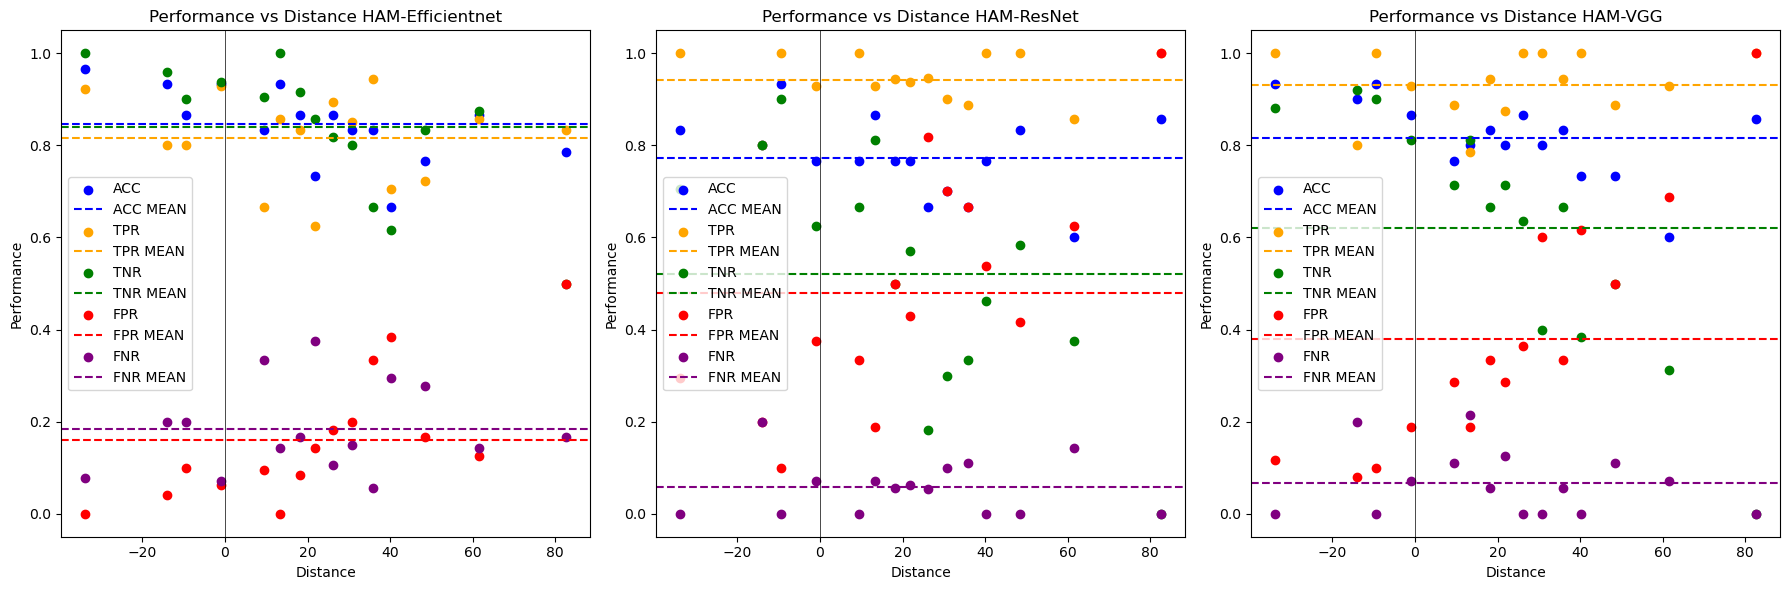

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
po_efficientnet.display_distance_performance(ax[0])
po_resnet.display_distance_performance(ax[1])
po_vgg.display_distance_performance(ax[2])
plt.tight_layout()
plt.show()